In [2]:
import torch
from torch.nn.functional import grid_sample, interpolate
from matplotlib import pyplot as plt
from skimage import data

/home/davton/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
N = 16
s_max = 4



input = torch.arange(0,N).reshape((1,1,1,N)).float()
input = input + input.clone().transpose(2,3)*100
input

tensor([[[[0.0000e+00, 1.0000e+00, 2.0000e+00, 3.0000e+00, 4.0000e+00,
           5.0000e+00, 6.0000e+00, 7.0000e+00, 8.0000e+00, 9.0000e+00,
           1.0000e+01, 1.1000e+01, 1.2000e+01, 1.3000e+01, 1.4000e+01,
           1.5000e+01],
          [1.0000e+02, 1.0100e+02, 1.0200e+02, 1.0300e+02, 1.0400e+02,
           1.0500e+02, 1.0600e+02, 1.0700e+02, 1.0800e+02, 1.0900e+02,
           1.1000e+02, 1.1100e+02, 1.1200e+02, 1.1300e+02, 1.1400e+02,
           1.1500e+02],
          [2.0000e+02, 2.0100e+02, 2.0200e+02, 2.0300e+02, 2.0400e+02,
           2.0500e+02, 2.0600e+02, 2.0700e+02, 2.0800e+02, 2.0900e+02,
           2.1000e+02, 2.1100e+02, 2.1200e+02, 2.1300e+02, 2.1400e+02,
           2.1500e+02],
          [3.0000e+02, 3.0100e+02, 3.0200e+02, 3.0300e+02, 3.0400e+02,
           3.0500e+02, 3.0600e+02, 3.0700e+02, 3.0800e+02, 3.0900e+02,
           3.1000e+02, 3.1100e+02, 3.1200e+02, 3.1300e+02, 3.1400e+02,
           3.1500e+02],
          [4.0000e+02, 4.0100e+02, 4.0200e+02, 4.030

In [4]:
downsampled_input = interpolate(input, (N//s_max, N//s_max), align_corners=True, mode="bicubic")
downsampled_input

tensor([[[[   0.,    5.,   10.,   15.],
          [ 500.,  505.,  510.,  515.],
          [1000., 1005., 1010., 1015.],
          [1500., 1505., 1510., 1515.]]]])

In [5]:
start = 0
end = 3

cropped_input = downsampled_input[..., start:end, start:end]
cropped_input

tensor([[[[   0.,    5.,   10.],
          [ 500.,  505.,  510.],
          [1000., 1005., 1010.]]]])

In [6]:
from typing import Tuple


def get_grid(low_res: Tuple[int,int], high_res: Tuple[int, int], crops_low: Tuple[Tuple[int, int], Tuple[int, int]]):
    boundaries = [[crop / low * 2 - 1 for crop, low in zip(crop_dim, low_res)] for crop_dim in crops_low]
    pixel_positions =  [torch.linspace(boundary[0], boundary[1], res) for boundary, res in zip(boundaries, high_res)]

    X, Y = torch.meshgrid(*pixel_positions, indexing='ij')
    return torch.stack((X,Y), dim=-1)[None]

In [7]:
low_res = (4,5)
high_res = (N,N)
crop = ((1,3), (2,4))

grid = get_grid(low_res, high_res, crop)

output = grid_sample(input, grid, mode="bilinear")

/home/davton/miniconda3/envs/thesis/lib/python3.9/site-packages/torch/nn/functional.py:4215: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


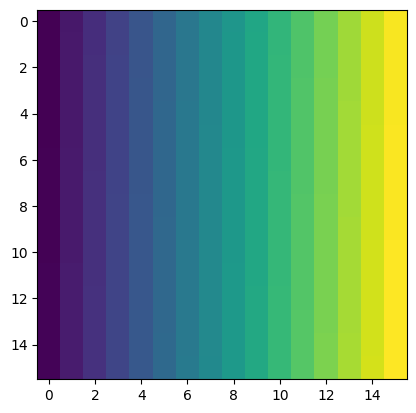

In [8]:
plt.imshow(output[0,0])

In [9]:
image = data.camera()
input = (torch.tensor(image)/255)[None, None]

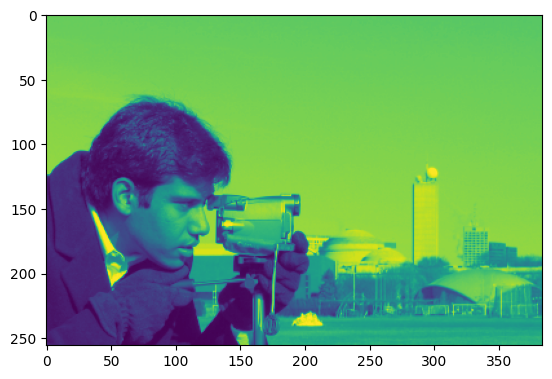

In [112]:
plt.imshow(image[:256, 128:])

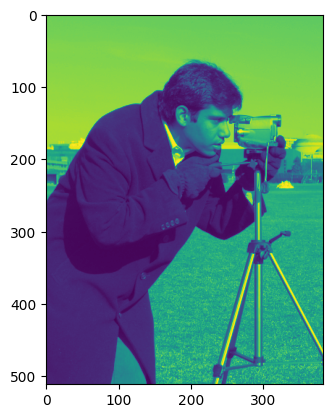

In [219]:
def get_grid(low_res: Tuple[int,int], high_res: Tuple[int, int], crops_low: Tuple[Tuple[int, int], Tuple[int, int]]):
    boundaries = [[crop / low * 2 - 1 for crop in crop_dim] for crop_dim, low in zip(crops_low, low_res)]
    pixel_positions =  [torch.linspace(boundary[0], boundary[1], res) for boundary, res in zip(boundaries, high_res)]

    X, Y = torch.meshgrid(*pixel_positions, indexing='ij')
    return torch.stack((Y, X), dim=-1)[None]

low_res = (64,64)
high_res = (512, 384)
crop = ((0,64), (0,48))

grid = get_grid(low_res, high_res, crop)
output = grid_sample(input, grid, mode="nearest", align_corners=True)
plt.imshow(output[0,0])

In [222]:
abs(output[0,0,1:511,1:384] - image[1:511,1:384]/255).std()

tensor(8.8596e-09, dtype=torch.float64)

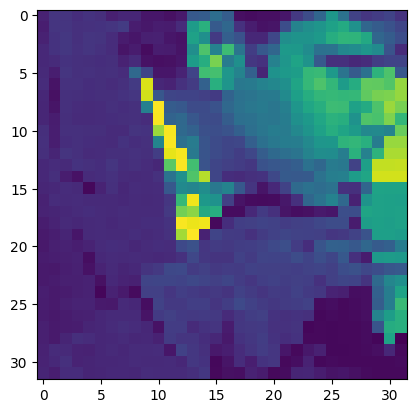

In [304]:
low_res_input = interpolate(input, low_res, align_corners=True, mode="bicubic")
cropped_low_res = low_res_input[..., crop[0][0]:crop[0][1], crop[1][0]:crop[1][1]]
plt.imshow(cropped_low_res[0,0])


In [ ]:

low_res_input = interpolate(input, low_res, align_corners=True, mode="bicubic")
cropped_low_res = low_res_input[..., crop[0][0]:crop[0][1], crop[1][0]:crop[1][1]]


In [199]:
output = grid_sample(input, grid[None], mode="nearest")

torch.Size([1, 1, 16, 16])

In [163]:
small_grid = grid[0:2, 0:2]
small_grid[..., 1]

tensor([[-0.5000, -0.5000],
        [-0.3889, -0.3889]])

In [164]:
small_output = grid_sample(input, small_grid[None], mode="nearest")
small_output

/home/davton/miniconda3/envs/thesis/lib/python3.9/site-packages/torch/nn/functional.py:4215: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


tensor([[[[408., 408.],
          [408., 408.]]]])

In [165]:
small_grid[0,0]

tensor([ 0.0000, -0.5000])

In [166]:
input[:,:,8,4]

tensor([[804.]])

In [136]:
(0+1)/2*16

8.0

In [138]:
input[...,8,4]

tensor([[804.]])

In [115]:
downsampled_input[..., 1:3, 2:4]

tensor([[[[ 510.,  515.],
          [1010., 1015.]]]])

In [116]:
grid_sample(input, grid[None])[0,0,0]

/home/davton/miniconda3/envs/thesis/lib/python3.9/site-packages/torch/nn/functional.py:4215: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


tensor([357.5000, 358.2273, 358.9546, 359.6818, 360.4091, 361.1364, 361.8636,
        362.5909, 363.3182, 364.0454, 364.7727, 182.5000])

In [63]:
input.shape

torch.Size([1, 1, 16, 16])

In [31]:
start_up = start*s_max/N
end_up = end*s_max/N 

start_up, end_up = [x*2-1 for x in [start_up, end_up]]
start_up, end_up

(-1.0, 0.5)

In [171]:
s = 4
pixel_positions =  torch.linspace(start_up, end_up, (end-start)*s)
pixel_positions

tensor([-1.0000, -0.9636, -0.9273, -0.8909, -0.8545, -0.8182, -0.7818, -0.7455,
        -0.7091, -0.6727, -0.6364, -0.6000, -0.5636, -0.5273, -0.4909, -0.4545,
        -0.4182, -0.3818, -0.3455, -0.3091, -0.2727, -0.2364, -0.2000, -0.1636,
        -0.1273, -0.0909, -0.0545, -0.0182,  0.0182,  0.0545,  0.0909,  0.1273,
         0.1636,  0.2000,  0.2364,  0.2727,  0.3091,  0.3455,  0.3818,  0.4182,
         0.4545,  0.4909,  0.5273,  0.5636,  0.6000,  0.6364,  0.6727,  0.7091,
         0.7455,  0.7818,  0.8182,  0.8545,  0.8909,  0.9273,  0.9636,  1.0000])

In [172]:
grid = pixel_positions.reshape(1,1, pixel_positions.shape[0])
grid = torch.stack([grid, torch.zeros_like(grid)], dim=-1)
grid_sample(input[None], grid, align_corners=True)

tensor([[[[ 0.0000,  1.0000,  2.0000,  3.0000,  4.0000,  5.0000,  6.0000,
            7.0000,  8.0000,  9.0000, 10.0000, 11.0000, 12.0000, 13.0000,
           14.0000, 15.0000, 16.0000, 17.0000, 18.0000, 19.0000, 20.0000,
           21.0000, 22.0000, 23.0000, 24.0000, 25.0000, 26.0000, 27.0000,
           28.0000, 29.0000, 30.0000, 31.0000, 32.0000, 33.0000, 34.0000,
           35.0000, 36.0000, 37.0000, 38.0000, 39.0000, 40.0000, 41.0000,
           42.0000, 43.0000, 44.0000, 45.0000, 46.0000, 47.0000, 48.0000,
           49.0000, 50.0000, 51.0000, 52.0000, 53.0000, 54.0000, 55.0000]]]])